
<h2><center><font color='black'>   Keeping up with the Deep-Learning Curve via Keras </font></center></h2>

<img src='imgs/front_3.png' align='middle'/>

<img src='imgs/neuron_test.png' align='middle'/>

<img src='imgs/neural_score.png' align='middle'/>


<img src='imgs/lin_class.png'/>

<img src='imgs/softmax.png'/>

<img src='imgs/linear_2.png'/>

<img src='imgs/mnist_wt.png' align='middle'/>

<h4><center><font color='#F87217'>  XOR Example </font></center></h4>
<img src='imgs/xor_test.png' align='middle'/>

<h4><center><font color='#F87217'>  XOR Transformed </font></center></h4>
<img src='imgs/xor_trans.png'/>

<h4><center><font color='#F87217'>Convex Cost Function </font></center></h4>

<img src='imgs/convex_new1.png'/>

<h4><center><font color='#F87217'>Non-Convex Cost Function </font></center></h4>

<img src='imgs/non_convex.png'/>


<img src='imgs/backprop_clean.png'/>

<img src='imgs/cnn_1.png'/>

<img src='imgs/cnn_3.png'/>

<h4><center><font color='#F87217'>AlexNet </font></center></h4>

<img src='imgs/alex3.png'/>

<h4><center><font color='#F87217'> Convolutional Layer </font></center></h4>

<img src='imgs/3D_Convolution_Animation.gif'/>

<h4><center><font color='#F87217'>Our 96 Filters </font></center></h4>
<img src='imgs/gabor1.png'/>

<h4><center><font color='#F87217'> Max-Pooling Layer </font></center></h4>
<img src='imgs/max_pool.png'/>


<h4><center><font color='#F87217'>Final Layers  </font></center></h4>
<img src='imgs/more_filters.png'/>

Credits: [Yosinski](http://yosinski.com)




<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'> High-Level Deep Learning Library for Theano & Tensorflow  </font></center></h4>
 


Keras was developed to allow for fast and easy deep-learning prototyping through the use of: 
  - user friendliness


Keras was developed to allow for fast and easy deep-learning prototyping through the use of: 
 - user-friendliness
 - modularity
 

Keras was developed to allow for fast deep-learning prototyping through the use of: 
 - user-friendliness
 - modularity
 - extensibility
 

In [13]:
import numpy as np
np.random.seed()

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, ZeroPadding2D, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM
from keras.layers import Embedding, Input 
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.vis_utils import model_to_dot, plot_model

from IPython.display import SVG
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sys

import seaborn as sns
%matplotlib inline

In [7]:
keras.__version__

'2.0.6'

In [4]:
sns.set_style('white')


from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y


In [5]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

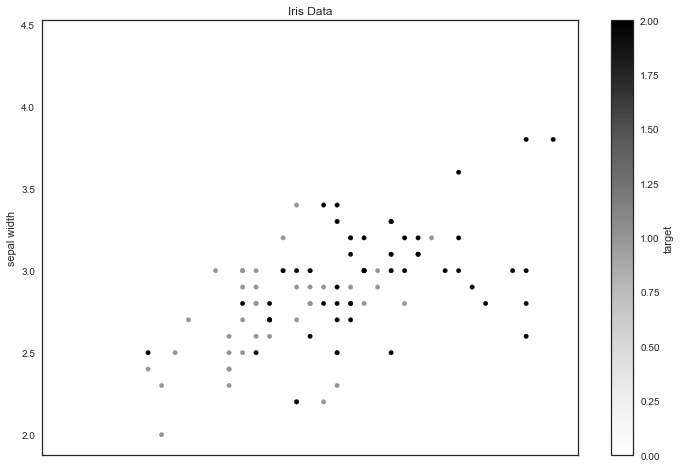

In [8]:
#ax=subplot(1,1,1)

#plt.scatter(data[0],data[1], c=data.target)
plt.figure(figsize=(10,7))
ax=data.plot(kind='scatter',x=0,y=1,c='target',legend=False,figsize=(12,8))
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data')
plt.show()

In [10]:
#  Define our first Model.. 

model=Sequential()
# output will be number of classes, and input will be # of features
model.add(Dense(units=3,input_dim=4))
model.add(Activation("softmax"))

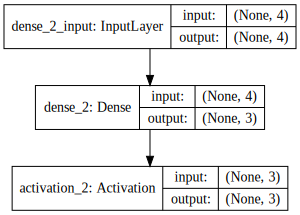

In [11]:
# output from previous layer --> input to the next layer 
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [8]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

y=to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

np.random.ran
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(X_train,y_train,nb_epoch=10,validation_data=(X_test,y_test),batch_size=32)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s - loss: 0.8112 - acc: 0.5800 - val_loss: 0.6458 - val_acc: 0.7000
Epoch 2/10
100/100 [==============================] - 0s - loss: 0.7418 - acc: 0.6500 - val_loss: 0.5713 - val_acc: 0.9000
Epoch 3/10
100/100 [==============================] - 0s - loss: 0.6129 - acc: 0.8600 - val_loss: 0.5917 - val_acc: 0.7200
Epoch 4/10
100/100 [==============================] - 0s - loss: 0.6171 - acc: 0.7300 - val_loss: 0.5141 - val_acc: 0.9800
Epoch 5/10
100/100 [==============================] - 0s - loss: 0.5505 - acc: 0.8700 - val_loss: 0.4939 - val_acc: 0.9200
Epoch 6/10
100/100 [==============================] - 0s - loss: 0.5309 - acc: 0.9600 - val_loss: 0.4627 - val_acc: 0.9200
Epoch 7/10
100/100 [==============================] - 0s - loss: 0.5095 - acc: 0.8300 - val_loss: 0.4592 - val_acc: 0.9000
Epoch 8/10
100/100 [==============================] - 0s - loss: 0.5020 - acc: 0.9500 - val_lo

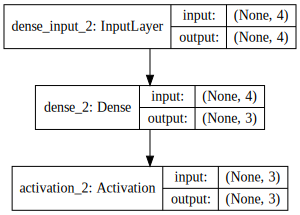

In [9]:
# Again, what did we do ?

model=Sequential()
# output will be number of classes, and input will be # of features
model.add(Dense(output_dim=3,input_dim=4))
model.add(Activation("softmax"))

SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [10]:
# Let's build the model again.. 

model=Sequential()
model.add(Dense(output_dim=64,input_dim=4))
model.add(Activation("relu"))
model.add(Dense(output_dim=32))
model.add(Activation("relu"))
model.add(Dense(output_dim=3))
model.add(Activation("softmax"))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# adding early stopping 
my_callback=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
model.fit(X_train,y_train,nb_epoch=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[my_callback])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s - loss: 1.6446 - acc: 0.3400 - val_loss: 1.1870 - val_acc: 0.3200
Epoch 2/10
100/100 [==============================] - 0s - loss: 1.0819 - acc: 0.3000 - val_loss: 0.7880 - val_acc: 0.7000
Epoch 3/10
100/100 [==============================] - 0s - loss: 0.8199 - acc: 0.6100 - val_loss: 0.6959 - val_acc: 0.7000
Epoch 4/10
100/100 [==============================] - 0s - loss: 0.7034 - acc: 0.7600 - val_loss: 0.8422 - val_acc: 0.6800
Epoch 5/10
100/100 [==============================] - 0s - loss: 0.7657 - acc: 0.5900 - val_loss: 0.5462 - val_acc: 0.7000
Epoch 6/10
100/100 [==============================] - 0s - loss: 0.6023 - acc: 0.6300 - val_loss: 0.3986 - val_acc: 0.8600
Epoch 7/10
100/100 [==============================] - 0s - loss: 0.4317 - acc: 0.8700 - val_loss: 0.3400 - val_acc: 0.9800
Epoch 8/10
100/100 [==============================] - 0s - loss: 0.3724 - acc: 0.9600 - val_lo

###  What can be gained by making the network wider & deeper?   


###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any function (given enough training data)


###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any reasonable function (however.. )
 -  A deep network can be quite good at generalization

##  And now,  CNN in Keras! 


#### Macroarchitecture of VGG16
<img src='imgs/VGG.png'/>

In [ ]:
from keras import backend as K
from keras.utils.np_utils import convert_kernel

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np
import pandas as pd

In [20]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [13]:
# get labels
!curl https://raw.githubusercontent.com/torch/tutorials/master/7_imagenet_classification/synset_words.txt -o synset_words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31675  100 31675    0     0  17326      0  0:00:01  0:00:01 --:--:-- 17327


Download weights from [here](https://github.com/fchollet/deep-learning-models/releases)

In [21]:
model = VGG_16('/Users/julialintern/Downloads/vgg16_weights.h5')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

OSError: Unable to open file (Unable to open file: name = '/users/julialintern/downloads/vgg16_weights.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [17]:
synset = pd.read_csv('synset_words.txt', skipinitialspace=True, names = ['synset', 'words'])

In [15]:
def prepare_image(image_path):
    im = cv2.resize(cv2.imread(image_path), (224, 224)).astype(np.float32)

    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    return im

<img src='imgs/sloth.jpg'/>

In [18]:
img = prepare_image('sloth.jpg')
out = model.predict(img)
y_pred = np.argmax(out)

print y_pred
print synset.loc[y_pred].synset

968
n07930864 cup


## Recurrent Neural Nets




<img src='imgs/fc_piece.png'/>
<img src='imgs/rnn3.jpg'/>

### LSTM  - Long Short Term Memory

<img src='imgs/lstm_3_anno.png'/>
<img src='imgs/lstm_eqn.png'/>

In [19]:
# load text & convert to lower case..
# You can load this from nltk_data/corpora
my_file='shakespeare-caesar.txt'
file_1='shakespeare-hamlet.txt'
file_2='shakespeare-macbeth.txt'

my_text=open(my_file).read()
my_one=open(file_1).read()
my_two=open(file_2).read()

alls=my_text+my_one+my_two
my_text=alls.lower()


# TODO : redo in pandas
#Create a mapping of unique Characters to integers
chars = sorted(list(set(my_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))


n_chars = len(my_text)
vocab = len(chars)

print "Total Characters: ", n_chars
print "Total Vocab: ", vocab
# prepare the dataset of input to output pairs encoded as integers

Total Characters:  375542
Total Vocab:  50


In [26]:
# Developing our input & output: 

max_len = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(my_text) - max_len, step):
    sentences.append(text[i: i + max_len])
    next_chars.append(text[i + max_len])
print('nb sequences:', len(sentences))

('nb sequences:', 125174)


In [21]:
print('Vectorization..')
X=np.zeros((len(sentences),max_len,vocab))
y=np.zeros((len(sentences),vocab))

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1

Vectorization..


In [22]:
# use 'fast_compile' for more specific error traceback
import theano
theano.config.optimizer='fast_compile'

In [29]:
# OUR MODEL;

model=Sequential()

model.add(LSTM(128,input_shape=(max_length, vocab)))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


model.fit(X, y, batch_size=128, nb_epoch=10)

model.save_weights('model_save.h5')


Epoch 1/10
125174/125174 [==============================] - 122s - loss: 2.0816   
Epoch 2/10
125174/125174 [==============================] - 128s - loss: 1.7153   
Epoch 3/10
125174/125174 [==============================] - 127s - loss: 1.6100   
Epoch 4/10
125174/125174 [==============================] - 126s - loss: 1.5481   
Epoch 5/10
125174/125174 [==============================] - 127s - loss: 1.5078   
Epoch 6/10
125174/125174 [==============================] - 129s - loss: 1.4777   
Epoch 7/10
125174/125174 [==============================] - 130s - loss: 1.4521   
Epoch 8/10
125174/125174 [==============================] - 130s - loss: 1.4319   
Epoch 9/10
125174/125174 [==============================] - 128s - loss: 1.4113   
Epoch 10/10
125174/125174 [==============================] - 145s - loss: 1.4026   


In [30]:

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [31]:
seed='Friends, Romans, countrymen, lend me your ears'
# Subset of seed, because we need to maintain length of 20 as input
true_seed=seed[:20].lower()



# As we increase the 'temperature', we see that the text generation becomes less predictable
for diversity in [0.2, 0.5, 1.0, 1.2]:
    #print()
    print('----- diversity:', diversity)

    generated = ''
    #sentence = my_text[start_index: start_index + max_length]
    sentence= true_seed
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    print('\n')
    
    sys.stdout.write(generated)

    for i in range(400):
        x = np.zeros((1, max_length, len(chars)))
        for t, char in enumerate(sentence):
            x[0, t, char_to_int[char]] = 1.

        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = int_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print('\n'*3)

('----- diversity:', 0.2)
----- Generating with seed: "friends, romans, cou"


friends, romans, countrymen,
and stand to the countrymen,
and the sayes the part he beare the countrymen,
and the perule man in the countrymen,
and stand all the strange of the deed,
and the peese and country

   ham. why the play a hamber of the country
a countronce in the countrymen,
and the words of the countrymen,
and the strange of the more a come to the countrymen,
and in the more the country
a hand of the coun



('----- diversity:', 0.5)
----- Generating with seed: "friends, romans, cou"


friends, romans, countrymen,
and but the streat a soule,
i will see you speake, but what shall lead the conish deer'd to speakes walke, and by valius of all stand of flay:
i haue do you stay the pointly steele,
and the terre haue giuen,
and still not for this bleade you liue him are how thou haue a most seene the calle,
and stand might and burse that of the canglesse,
all the sold come of my friend, and bleed in th

## Explorations  in Keras : Deep-Fashion
<img src='imgs/deep_fashion.png'/>

[DeepFashion: Powering Robust Clothes Recognition and Retrieval
with Rich Annotations, Liu et al]('http://www.ee.cuhk.edu.hk/~xgwang/papers/liuLQWTcvpr16.pdf')

- Liu et al, Chinese University of Hong Kong
- 800 K images: annotated 
- FashionNet: learns clothing features by jointly predicting on attributes and landmarks. 

FashionNet nutshell : 
 - Inputs: regional input (for this ex: upper body clothes)
 - Predictions :  attributes (ex: abstract floral print) , categories (top, dress..) , clothing landmarks, and landmark visibility
- Essentially the left lower branch is based off VGG 16.. we will modify the architecture from there.
     
     

<img src='imgs/landmarks.png'>

In [22]:
from keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet')

/Users/julialintern/anaconda/envs/ipython_env/lib/python3.5/site-packages/keras/applications/vgg16.py:181: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


In [24]:
#SVG(model_to_dot(vgg16,show_shapes=True).create(prog='dot',format='svg'))

In [25]:
# Freeze layers before the 5th conv. block
for layer in vgg16.layers[:14]:
    layer.trainable = False

In [ ]:
# grab output directly after last conv layer

convs = vgg16.get_layer('flatten').output

In [ ]:
# pick up where that left off. . 
#create new layers
new = Dense(4096, activation='relu', name='fc6_pose')(convs)
new = Dense(4096, activation='relu', name='fc7_pose')(new)

# predict locations

# output : 2 visibility probabilities
vis1 = Dense(2, activation='softmax', name='visibility1')(new)
vis2 = Dense(2, activation='softmax', name='visibility2')(new)
vis3 = Dense(2, activation='softmax', name='visibility3')(new)
vis4 = Dense(2, activation='softmax', name='visibility4')(new)
vis5 = Dense(2, activation='softmax', name='visibility5')(new)
vis6 = Dense(2, activation='softmax', name='visibility6')(new)

# landmark outputs
lm=Dense(12,activation='linear',name='landmarks')(new)

outputs=[vis1, vis2, vis3, vis4,vis5, vis6, lm]

model = Model(input=vgg16.input, output=outputs)
#model.summary()

In [32]:
# We can create our own custom loss functions in Keras.. 


def custom_objective(y_true, y_pred):
    '''tailored cost function'''
    
    #get landmarks

    pred_lm=y_pred[6]
    true_lm=y_true[6]
    
    pred_lm=K.reshape(pred_lm,(6,2))
    true_lm=K.reshape(true_lm,(6,2))
    
    # get visibility binaries
    true_viz=y_true[:6]
    
    # predict if visible or not, if not visible, set landmark loss to zero
    wins=K.argmax(true_viz,axis=1)
    
    #shapes : wins: (1,6), pred_lm: 6,2
    loss=K.mean(K.square(K.dot(wins,(pred_lm-true_lm))))

    return loss

In [ ]:
# Assign specific loss functions, metrics & weights to specific outputs.. 

from keras.optimizers import SGD, Adam

losses={'visibility1':'binary_crossentropy','visibility2':'binary_crossentropy','visibility3':'binary_crossentropy',
        'visibility4':'binary_crossentropy','visibility5':'binary_crossentropy',
'visibility6':'binary_crossentropy', 'landmarks':custom_objective}

my_metrics={'visibility1':single_class_accuracy(0),'visibility2':single_class_accuracy(0),'visibility3':single_class_accuracy(0),
        'visibility4':single_class_accuracy(0),'visibility5':single_class_accuracy(0),
'visibility6':single_class_accuracy(0),'landmarks':'mean_squared_error'}

adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss=losses,optimizer=adam,metrics=my_metrics)

In [ ]:
# train

filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5'
mcp=keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

callback=[mcp]
test=model.fit_generator(train_flow_from_directory(train_generator, train_lab_1,train_lab_2,train_lab_3,train_lab_4,train_lab_5,train_lab_6, lm_train_labels),\
                         validation_data=test_flow_from_directory(test_generator, test_lab_1,test_lab_2,test_lab_3,test_lab_4,test_lab_5,test_lab_6,\
                                                                  lm_test_labels),
                         nb_epoch=20,samples_per_epoch=20000, nb_val_samples=5000,callbacks=callback)

In [29]:
def my_read(filename):
    ' read from an image file to an rgb '
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

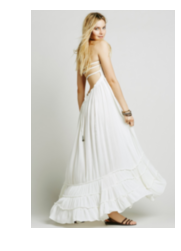

In [42]:
my_show(plt.gca(),ml)

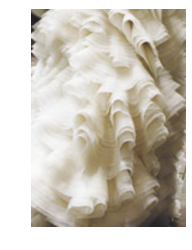

In [43]:
import cv2

# try blending 

ml   = my_read('/Users/julialintern/Downloads/without.jpg')
frog = my_read('/Users/julialintern/fall_2017/mcqueen2.png')

min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

# blending of two images:
# by:  img1 * wgt1 + img2 * wgt2 + wgt3
#      addWeights(img1, wgt1, img2, wgt2, wgt3)
dst = cv2.addWeighted( frog[:min_r, :min_c], 0.9,
                     ml[:min_r, :min_c], 0.1,0)
my_show(plt.gca(), dst)   

<img src='imgs/dress_two.png'/>

####  A Different type of Style Transer !
<img src='imgs/final_both.png'/>

<img src='imgs/thanks.png'/>